In [12]:
import numpy

import scipy
from scipy.spatial import distance_matrix

import matplotlib.pyplot as plt

# K-means

In [101]:
def split_nearest(x, centers):
    assert len(x.shape) == 2
    cl = distance_matrix(x, centers, p=2).argmin(axis=1)
    return [x[cl == i] for i in range(centers.shape[0])]

class k_means:
    def __init__(self, nclusters):
        self.nclusters = nclusters
        self.centers = None
        
    def train(self, x):
        self.centers = x[numpy.random.default_rng()
                .choice(x.shape[0], size=self.nclusters, replace=False)]
        prev = None
        while (prev != self.centers).all():
            cl = split_nearest(x, self.centers)
            new = numpy.array([x.mean(axis=0) if len(x)
                    else self.centers[i] for i, x in enumerate(cl)])
            self.centers, prev = new, self.centers
            
    def __call__(self, x):
        assert self.centers is not None
        return split_nearest(x, self.centers)

### testing

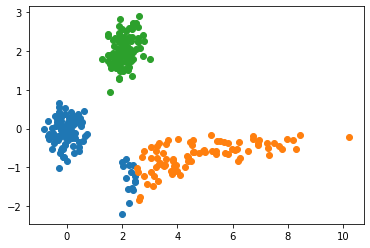

In [98]:
kcl = k_means(3)
st = numpy.array([2 + abs(numpy.random.randn(100)) * 3,
        numpy.random.randn(100)-3])
st[1] /= st[0]
x = numpy.concatenate([numpy.random.randn(100, 2)/3,
        2 + numpy.random.randn(100, 2)/3,
        st.T])
kcl.train(x)
for i in kcl(x):
    plt.scatter(i[:, 0], i[:, 1])
plt.show()